In [1]:
import numpy as np
from sklearn import datasets
from sklearn import tree

# Load iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Build decision tree classifier
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X, y)


dotfile = open("dt.dot", 'w')
tree.export_graphviz(dt, out_file=dotfile, feature_names=iris.feature_names)
dotfile.close()

from sklearn.tree import _tree
def tree_to_code(tree, feature_names):
	"""
	Outputs a decision tree model as a Python function
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as a function
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)

tree_to_code(dt, list(iris.feature_names))

def tree_to_pseudo(tree, feature_names):
	"""
	Outputs a decision tree model as if/then pseudocode
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as pseudocode
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	left = tree.tree_.children_left
	right = tree.tree_.children_right
	threshold = tree.tree_.threshold
	features = [feature_names[i] for i in tree.tree_.feature]
	value = tree.tree_.value

	def recurse(left, right, threshold, features, node, depth=0):
		indent = "  " * depth
		if (threshold[node] != -2):
			print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
			if left[node] != -1:
				recurse (left, right, threshold, features, left[node], depth+1)
				print(indent,"} else {")
				if right[node] != -1:
					recurse (left, right, threshold, features, right[node], depth+1)
				print(indent,"}")
		else:
			print(indent,"return " + str(value[node]))

	recurse(left, right, threshold, features, 0)
    

tree_to_pseudo(dt, list(iris.feature_names))

print(iris)

print(type(iris))

print(y)

y[y == 2] = 1 

print(y)

print(y[y == 1])

print(len(y[y == 1]))

from itertools import islice
new_data = islice(X,40)
new_data=list(new_data)

print(list(new_data))

one_data = []

for i in range(50,130):
    one_data.append(X[i])


print(one_data)

final_data = new_data + one_data

print(final_data)

print(len(final_data))

zeros = [0]*40
ones = [1]*80

target_val = zeros + ones

print(target_val)

test_data = []

for i in range(40,50):
    test_data.append(X[i])

print(test_data)

for i in range(130,150):
    test_data.append(X[i])
print(test_data)

print(len(test_data))

from sklearn.linear_model import Perceptron
res = Perceptron(shuffle = True, random_state = 42)

res.fit(final_data,target_val)

score_train = res.score(final_data,target_val)

print(score_train)

zeros_target = [0]*10

one_target = [1]*20

target_test = zeros_target + one_target

score_test = res.score(test_data,target_test)



print(score_test)

error_training = 1 - score_train
error_test = 1- score_test

print(f"Error in training data {error_training}")
print(f"Error in testing data {error_test}")



def tree(sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)):
  if petal width (cm) <= 0.800000011920929:
    return [[50.  0.  0.]]
  else:  # if petal width (cm) > 0.800000011920929
    if petal width (cm) <= 1.75:
      if petal length (cm) <= 4.950000047683716:
        if petal width (cm) <= 1.6500000357627869:
          return [[ 0. 47.  0.]]
        else:  # if petal width (cm) > 1.6500000357627869
          return [[0. 0. 1.]]
      else:  # if petal length (cm) > 4.950000047683716
        if petal width (cm) <= 1.550000011920929:
          return [[0. 0. 3.]]
        else:  # if petal width (cm) > 1.550000011920929
          if petal length (cm) <= 5.450000047683716:
            return [[0. 2. 0.]]
          else:  # if petal length (cm) > 5.450000047683716
            return [[0. 0. 1.]]
    else:  # if petal width (cm) > 1.75
      if petal length (cm) <= 4.8500001430511475:
        if sepal width (cm) <= 3.100000023841858:
          return [[0. 0. 2.]]


In [6]:
print((res))

Perceptron(random_state=42)


In [7]:
clf = tree.DecisionTreeClassifier()
clf.fit(final_data,target_val)

DecisionTreeClassifier()

[Text(0.5, 0.75, 'X[2] <= 2.45\ngini = 0.444\nsamples = 120\nvalue = [40, 80]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 80\nvalue = [0, 80]')]

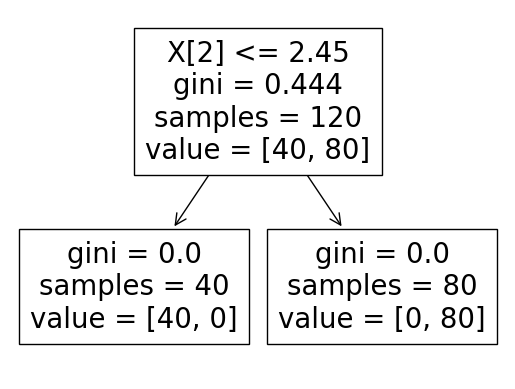

In [8]:
tree.plot_tree(clf)

In [9]:
tree_to_code(clf, list(iris.feature_names))

def tree(sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)):
  if petal length (cm) <= 2.449999988079071:
    return [[40.  0.]]
  else:  # if petal length (cm) > 2.449999988079071
    return [[ 0. 80.]]


In [10]:
test_pred = clf.predict(test_data)

In [14]:

error_now = 1-clf.score(test_data,target_test)
print("TEST ERROR: ",error_now)


TEST ERROR:  0.0
